# Multiple Linear Regression

## Importing the libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(font_scale=1.1, style="whitegrid")

## Importing the dataset

In [2]:
dataset = pd.read_csv('data/1000_Companies.csv')
dataset.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        1000 non-null   float64
 1   Administration   1000 non-null   float64
 2   Marketing Spend  1000 non-null   float64
 3   State            1000 non-null   object 
 4   Profit           1000 non-null   float64
dtypes: float64(4), object(1)
memory usage: 39.2+ KB


## Matrix of features and labels

In [4]:
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

print(f"X {X.shape}")
print(f"y {y.shape}")

X (1000, 4)
y (1000,)


## Visualizing the dataset

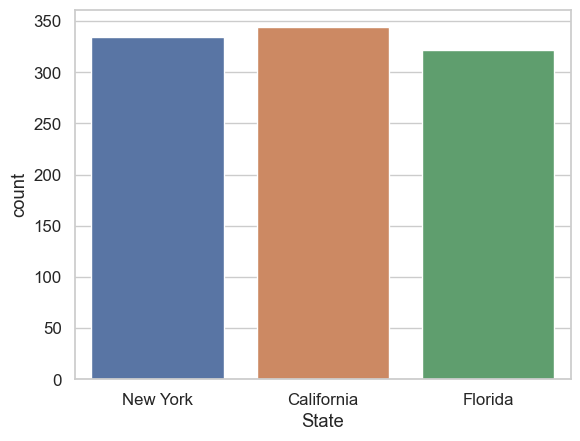

In [5]:
sns.countplot(data=dataset, x="State");

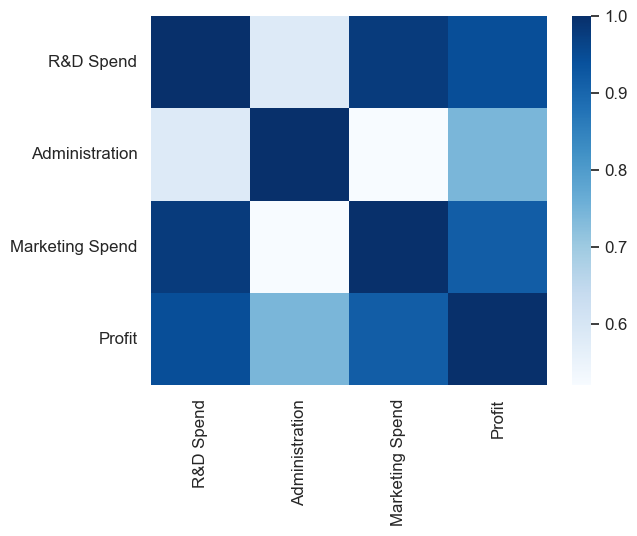

In [6]:
sns.heatmap(dataset.corr(numeric_only=True), cmap="Blues");

## Encoding categorical data

In [7]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
#
# transformers: list of tuples
# List of (name, transformer, columns) tuples 
# specifying the transformer objects to be applied to subsets of the data.
# For avoiding dummy variable trap, drop the first column.
ct = ColumnTransformer(
    transformers=[("encoded_state", OneHotEncoder(drop="first"), [3])],
    remainder="passthrough",
)
X = ct.fit_transform(X)
print(X[:5, :])

## Alternative
# enc = OneHotEncoder(drop="first", sparse_output=False)
# encoded = enc.fit_transform(X[:, [3]])
# X = np.hstack((encoded, X[:, :-1]))

[[0.0 1.0 165349.2 136897.8 471784.1]
 [0.0 0.0 162597.7 151377.59 443898.53]
 [1.0 0.0 153441.51 101145.55 407934.54]
 [0.0 1.0 144372.41 118671.85 383199.62]
 [1.0 0.0 142107.34 91391.77 366168.42]]


## Splitting the dataset into the Training set and Test set

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

## Training the Multiple Linear Regression model on the Training set

In [9]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

## Predicting the Test set results

In [13]:
y_pred = regressor.predict(X_test)
np.set_printoptions(precision=2)
result = np.hstack((y_pred.reshape(-1, 1), y_test.reshape(-1, 1)))
print(result[:5, :])

[[ 89790.62  89012.03]
 [ 88427.07  87654.56]
 [ 94894.68  94093.35]
 [175680.87 175396.26]
 [ 83411.73  83356.62]]


## Evaluating the model

In [19]:
from sklearn.metrics import r2_score

r2 = r2_score(y_test, y_pred)
print(f"The R2 score of the model: {r2:.3f}")

The R2 score of the model: 0.911
